# NYC Motor Vehicle Collisions Data Set 
### Michael Pajewski 
### 6/25/2021


In [239]:
import pandas as pd
from pandas_profiling import ProfileReport
import missingno as msno
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from IPython import display
import numpy as np
import scipy.stats as stats

# Data Overview 
Information on this dataset is found thought the NYC open data project. This dataset contains information from police reports "where someone is injured or killed, or where there is at least $1000 worth of damage". In this project I will explore the relationships of month, year, and location with the number of persons killed. 

The data set including the data dictionary was pulled from the following resource.
https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95    

# Data Import and Setup

In [219]:
#import data set
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")
#dop tail of df to remove erros 
df.drop(df.tail(4).index,inplace=True)

In [215]:
df.head(2)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH YEAR,CRASH MONTH,PERSONS KILLED,Fatal Crash
0,2021-04-14,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,4407480.0,Sedan,Sedan,NaN,NaN,NaN,2021,4,NaN,0.0
1,2021-04-13,21:35,BROOKLYN,11217.0,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,4407147.0,Sedan,NaN,NaN,NaN,NaN,2021,4,NaN,0.0


In [164]:
#checking data types 
df.dtypes
#convert Crash date to date
df['CRASH DATE'] =pd.to_datetime(df['CRASH DATE'])

In [165]:
df.shape

(625911, 29)

In [166]:
#checking for duplicate values 
#there are no duplicate values based on the ID
df[df['COLLISION_ID'].duplicated()]

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5


# EDA

## Missingness plot
The missingness plot shows there is some missing data in the location categories. When specifically looking at where crashes have occurred these entries will need to me removed from the data set.


<AxesSubplot:>

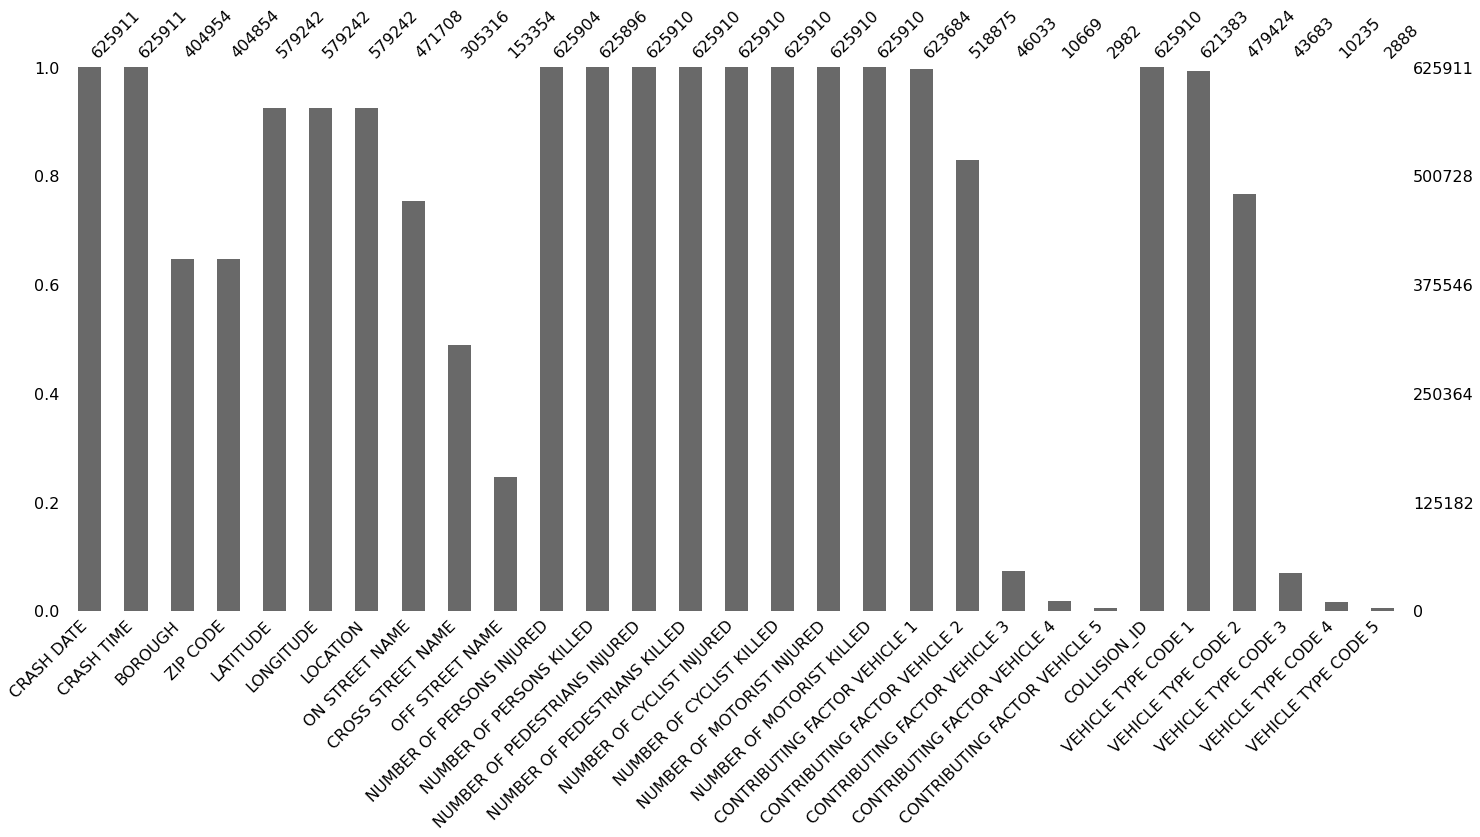

In [167]:
#Visualize missing values
msno.bar(df)

## Profile Report

Here I use the profile report package to get a quick high level summary of all factors in the data set. This is a great tool to be able to quickly see a lot of information about a data set. It can be very useful for better understanding all factors in a data set giving you the opportunity to dive deeper into specific factors. For this data set I will specifically focus on crash date, crash time, borough, location, and number of persons killed. 


In [168]:

profile = ProfileReport(df, 
                        title='GSS Profiling Report',
                        html={'style':{'full_width':True}},
                       minimal=True, correlations={'pearson': {'calculate': False}})
profile

# Crash Date
Visualizing crash dates to see if there are patterns in when fatal crashes occur

In [169]:
# creating year and month features
df["CRASH YEAR"] = pd.DatetimeIndex(df['CRASH DATE']).year
df["CRASH MONTH"] = pd.DatetimeIndex(df['CRASH DATE']).month

# create df of group by year 
df_crash_year = df.groupby(['CRASH YEAR']).sum()
df_crash_year = df_crash_year.drop(['ZIP CODE', 'LATITUDE','LONGITUDE','COLLISION_ID','CRASH MONTH'], axis=1)

# create df of group by month
df_crash_month = df.groupby(['CRASH MONTH']).sum()
df_crash_month = df_crash_month.drop(['ZIP CODE', 'LATITUDE','LONGITUDE','COLLISION_ID','CRASH YEAR'], axis=1)

# create df of group by month and year
#sort df by mot
df_crash_month_year = df.groupby([(df['CRASH YEAR']),(df['CRASH MONTH'])]).sum()
df_crash_month_year = df_crash_month_year.drop(['ZIP CODE', 'LATITUDE','LONGITUDE','COLLISION_ID'], axis=1)

# #create count of collision df 
# count_collisions = df[['CRASH YEAR', 'COLLISION_ID']].groupby('CRASH YEAR').count()
# count_collisions = pd.DataFrame(count_collisions)
# count_collisions.columns = ['Number of Crashes recorded']

## Number of Persons Killed Per Year 

Looking at the chart Persons Killed Per Month there is a suspect number of crashes from 2013-2017. Looking at the table Number of Crashes recorded there is an extremely limited amount of data from those years. Looking at the data from 2018-2020 there is a steady increase in number of persons killed in crashes. In the Number of Crashes recorded it can be observed that from 2019 to 2020 there is a 46.6% decrease in number of record crashes but there is a 9.8% increase in the number of deaths.  One additional piece of information that would be useful to have would be if there was a change in how this data was collected or recorded. It is very suspect that the number of recorded collisions decreased so much while the number of persons killed slightly increased. Number of collisions could have been effect by the reduced movement of people during lockdown, but I would have suspected traffic deaths to also decrease with decrease movement. Given more time I would continue to explore this. 

One last note looking at the data from the year 2021 data is only available though 6/21/2021 this causes the short drop off in total persons killed in 2021.

Text(0, 0.5, 'Number Killed')

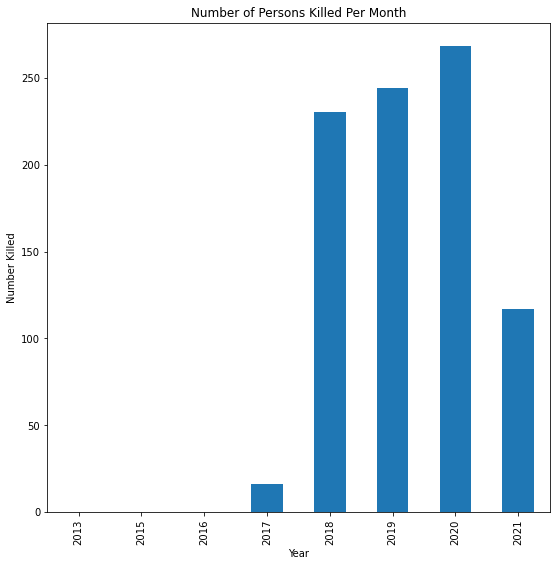

In [207]:
# visualizing fatalities per year
plt.figure(figsize=(9, 9))
df_crash_year['NUMBER OF PERSONS KILLED'].plot.bar()
plt.title("Number of Persons Killed Per Month")
plt.xlabel('Year')
plt.ylabel('Number Killed')

In [213]:
df[['CRASH YEAR', 'NUMBER OF PERSONS KILLED']].groupby('CRASH YEAR').sum()

,NUMBER OF PERSONS KILLED
CRASH YEAR,
2013,0.0
2015,0.0
2016,0.0
2017,16.0
2018,230.0
2019,244.0
2020,268.0
2021,117.0


In [211]:
#create count of collision df 
count_collisions = df[['CRASH YEAR', 'COLLISION_ID']].groupby('CRASH YEAR').count()
count_collisions = pd.DataFrame(count_collisions)
count_collisions.columns = ['Number of Crashes recorded']
count_collisions

,Number of Crashes recorded
CRASH YEAR,
2013,2
2015,1
2016,98
2017,21182
2018,231563
2019,211482
2020,112872
2021,48710


## Number of Persons Killed Per Month Each Year

Looking at the graph Number of Persons Killed Per Month there are no obvious trends year over year trends in the data. Looking at the start of 2020 in March there is a clear reduction in traffic deaths with the onset of COVID lockdowns.  In May the number of persons killed in collisions has shot back matching the highest number of persons killed in any previous month.  The remaining months of 2022 into 2021 have numbers of deaths that match or exceed the num max number of deaths between 2013 through 2019. 

The bar plot Number of Persons Killed Per Calendar Month is created by grouping the data over all years into months to see if there are year over year seasonal trends in traffic deaths. The plot shows September and June have the highest number of traffic deaths. February, March, July, and August all have relatively similar low numbers of deaths in comparison to all other months. Given more time I would try to normalize the number of deaths per month per year to account for the data not having the same amount of data from every month for the years 2013-2021.    

Text(0, 0.5, 'Number Killed')

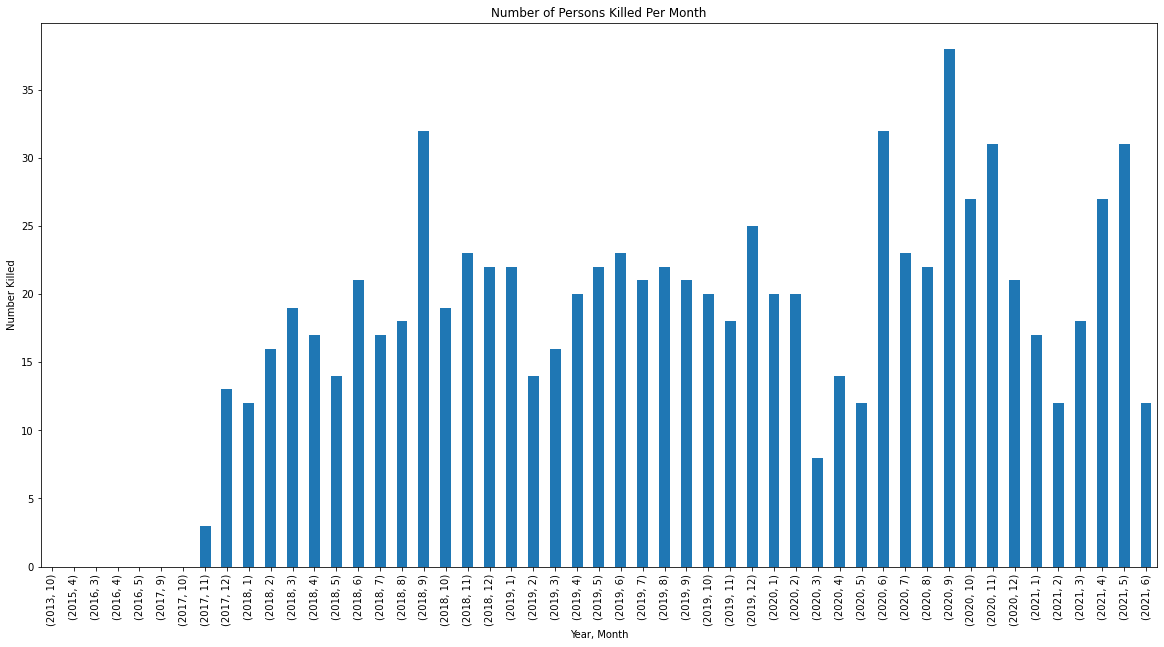

In [208]:
# visualizing fatalities per month/year 
plt.figure(figsize=(20, 10))
df_crash_month_year['NUMBER OF PERSONS KILLED'].plot.bar()
plt.title("Number of Persons Killed Per Month")
plt.xlabel('Year, Month')
plt.ylabel('Number Killed')

Text(0, 0.5, 'Number Killed')

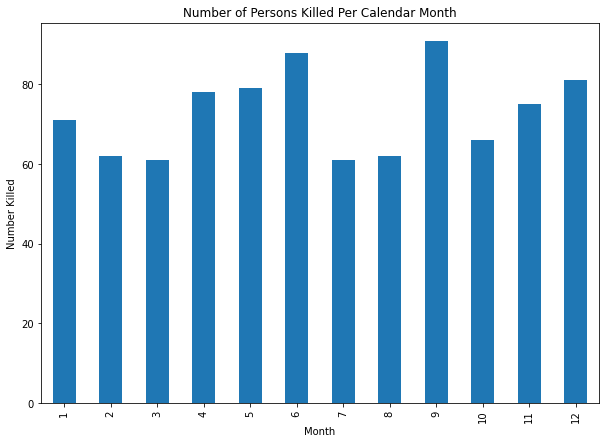

In [214]:
# visualizing fatalities per month
plt.figure(figsize=(10, 7))
df_crash_month['NUMBER OF PERSONS KILLED'].plot.bar()
plt.title("Number of Persons Killed Per Calendar Month")
plt.xlabel('Month')
plt.ylabel('Number Killed')

# Crash Location

Looking at the table below the highest number of fatal crashes occurred in Brooklyn with 166 crashes resulting in deaths and 171 people killed in these crashes.  Looking at the Percent of Crashes Resulting in Persons Killed, calculated by taking the number of crashes were any number of fatalities occurred divided by the total number of crashes record, Staten Island has the highest percent of crashes resulting in death.  Staten Island has significantly less number of fatal crashes with only 13992 between 2013-2021 in comparison to Brooklyn with 132779 recorded, but these crashes more often in death. 

In [224]:
# create binary outcome factor if a death did or did not occur in a crash 
replace_map = {0:0,
               1:1,2:1,3:1}
df['Fatal Crash'] = df['NUMBER OF PERSONS KILLED'].replace(replace_map)

In [226]:
# create df of group by Location  
df_crash_BOROUGH= df.groupby(['BOROUGH']).sum()
df_crash_BOROUGH = df_crash_BOROUGH[['Fatal Crash','NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED']]

#creat count of number of crashes
df_crash_BOROUGH_count= df.groupby(['BOROUGH']).count()
df_crash_BOROUGH_count = pd.DataFrame(df_crash_BOROUGH_count['COLLISION_ID'])
df_crash_BOROUGH['Crash Count'] = df_crash_BOROUGH_count['COLLISION_ID']

#creat % of crashes that end in death 
df_crash_BOROUGH['% of Crashes PERSONS KILLED'] = df_crash_BOROUGH['Fatal Crash'] / df_crash_BOROUGH['Crash Count']*100
df_out = df_crash_BOROUGH[['Fatal Crash','NUMBER OF PERSONS KILLED','Crash Count','% of Crashes PERSONS KILLED']]
df_out.columns = ['Number of Fatal Crashs', 'Total Number of Persons Killed', 'Number of Crashes', '% of Crashes Resulting in Persons Killed']
df_out


,Number of Fatal Crashs,Total Number of Persons Killed,Number of Crashes,% of Crashes Resulting in Persons Killed
BOROUGH,,,,
BRONX,61.0,61.0,67770,0.090010
BROOKLYN,166.0,171.0,132779,0.125020
MANHATTAN,75.0,75.0,76380,0.098193
QUEENS,160.0,165.0,114033,0.140310
STATEN ISLAND,24.0,24.0,13992,0.171527


## Chi-Square Test Crash Location
Below is the calculation for the Chi-square test for independence testing the null hypothesis that there is no significant relationship between Borough location and if a crash was fatal and the alternative hypothesis is that there is significant relationship between Borough location and if a crash was fatal. With a P value of 0.00391 we can conclude there is a significant relationship between Borough location and if a crash was fatal. This helps to validate the findings above that location plays a significant role in if crashes result in deaths. Given more time I would have run similar statistical test for more levels of analysis. 


In [237]:
#prep df 
sig_df = df[['Fatal Crash', 'BOROUGH']]
sig_df = sig_df[pd.notnull(sig_df['BOROUGH'])]
#caculate crosstab 
ct = pd.crosstab(sig_df['BOROUGH'], sig_df['Fatal Crash'])
ct

Fatal Crash,0.0,1.0
BOROUGH,,
BRONX,67704,61
BROOKLYN,132612,166
MANHATTAN,76302,75
QUEENS,113872,160
STATEN ISLAND,13967,24


In [251]:
#caculate Chi-Square, pvalue, degrees of freedom
chi_stat = stats.chi2_contingency(ct)
chi_stat

(15.414813656511583,
 0.003913853637851951,
 4,
 array([[6.76836706e+04, 8.13294464e+01],
        [1.32618644e+05, 1.59356028e+02],
        [7.62853347e+04, 9.16653010e+01],
        [1.13895142e+05, 1.36857661e+02],
        [1.39742084e+04, 1.67915633e+01]]))

## Visualization of crashes Tableau 

I quickly pulled this data set into Tableau to be able to visualize the distribution of crashes across the NYC area. It is possible to create a similar visual in Python but it takes only seconds in Tableau to create these visuals. One important point from the first map, Visual Map 1, is many of the values that have the Boroughs marked as Null are very clearly in one of the 5 Boroughs. If for this project it was very important to have these Null Borough values corrected it could be corrected by using the latitude and longitude values or other means.

Visual Map 2 more clearly shows the distinction between crashes in each Borough. One important note is that there is one data point marked in orange as being located in the Bronx when it is actually located in Southern Manhattan. I did not remove or correct this data point for the analysis done for this project but in future work this could be beneficial.


### Visual Map 1

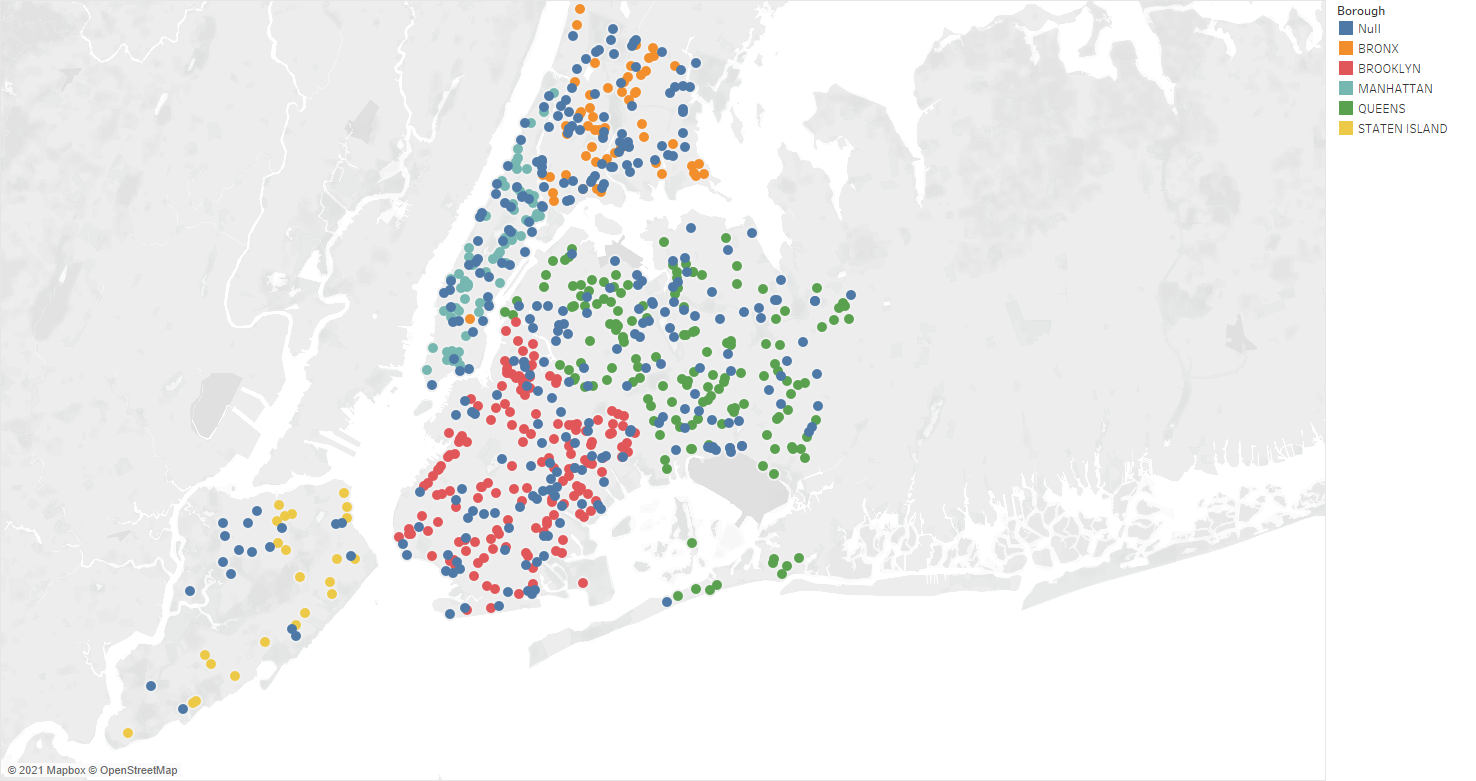

In [199]:

display.Image("./New York 1.png")

### Visual Map 2

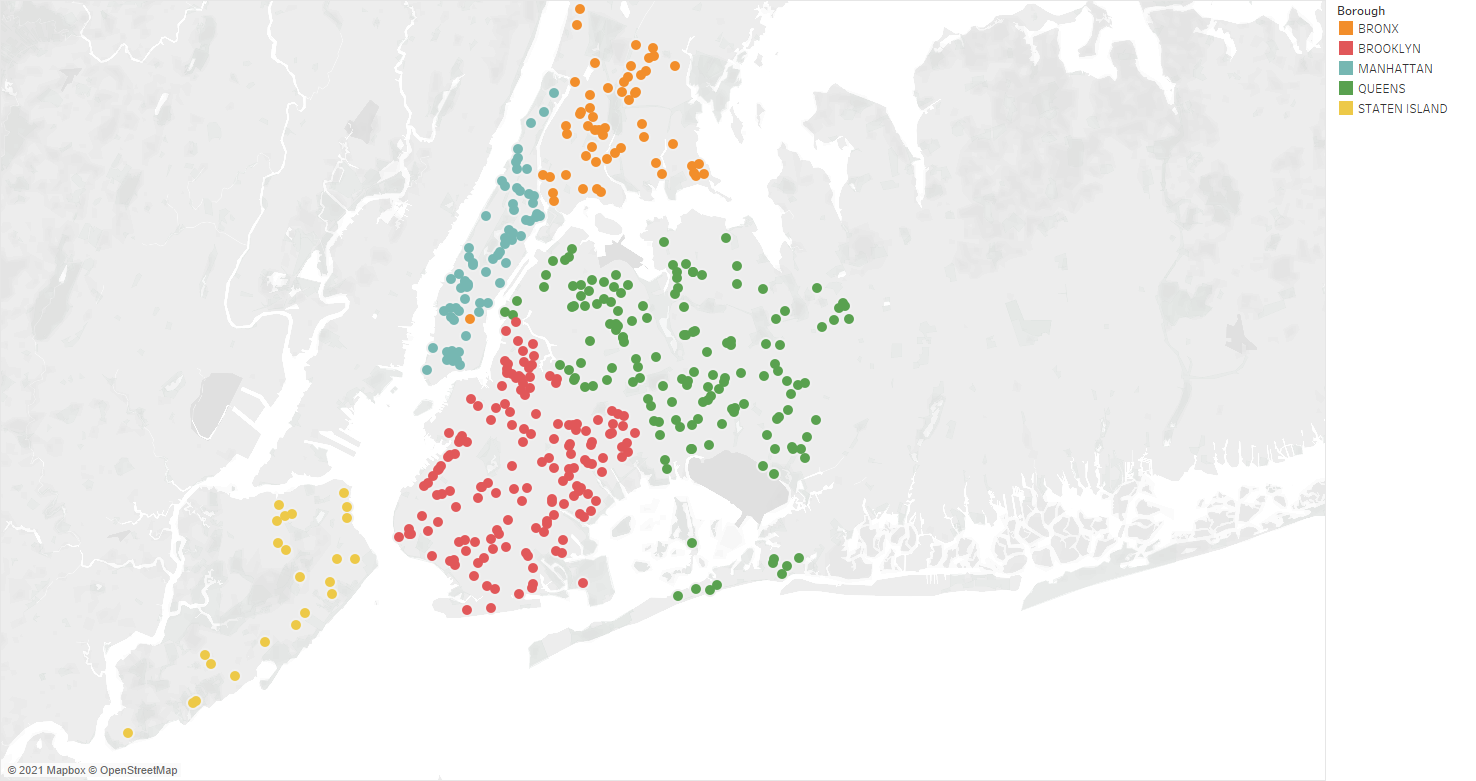

In [200]:
display.Image("./New York.png")

# Future Work
If given more time to delve into this dataset I would focus on the incident outcomes outside of total fatalities that I focused on in this analysis. This could include death and injury of pedestrians, death and injury cyclists, and injury of motorists.  I think it would also be interesting to dive into number of vehicles involved in crashes and the vehicle types to see if these can give insight into injury and death in collisions.

Given the limited time I did not dive deeply into the specific location information given by longitude and latitude coordinates. This location information could be used to derive if there are specific locations or streets where fatal accident are more likely to occur. This information could be used to target roadway areas that need safety improvements. 